In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import category_encoders as ce

In [2]:
file_path = "side_effect_data1.xlsx"

In [3]:
data = pd.read_excel(file_path)

# Understanding Data Structure

In [5]:
data.columns

Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
       'Kan Grubu', 'Kilo', 'Boy'],
      dtype='object')

In [6]:
data.head(11)

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0
5,131,Male,1982-01-05,Turkiye,NaN,fluoxetine dr,2022-01-07,2022-03-19,Agizda Farkli Bir Tat,2022-02-04 08:08:31,NaN,"Diyabet, Hipertansiyon",NaN,"Alzheimer, Kalp Hastaliklari",Kanser,"Diyabet, Kemik Erimesi",AB RH-,66.0,150.0
6,61,NaN,1997-01-10,Turkiye,Mersin,carbamazepine extended release,2022-01-05,2022-03-07,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Bugday,"KOAH, Diyabet","Kalp Hastaliklari, Kan Hastaliklari",NaN,"Kan Hastaliklari, Hipertansiyon","KOAH, Kalp Hastaliklari",NaN,NaN,147.0
7,95,NaN,1997-01-15,Turkiye,Antalya,thiothixene,2022-01-10,2022-03-07,Deride Morarma,2022-02-09 20:53:54,Ispanak,"Astim, Diyabet","Alzheimer, Diyabet",KOAH,"Guatr, Kan Hastaliklari","Guatr, Kan Hastaliklari",B RH+,96.0,162.0
8,3,Female,1973-08-05,Turkiye,NaN,"asenapine tablet, sublingual",2022-01-08,2022-03-17,Bas Agrisi,2022-02-19 04:14:26,Laktoz,NaN,"Kan Hastaliklari, Diger","Kanser, Guatr","Alzheimer, Hipertansiyon","Kanser, Kalp Hastaliklari",0 RH-,91.0,NaN
9,53,NaN,1941-10-16,Turkiye,Adana,fluphenazine hcl elixir,2022-01-10,2022-03-13,Gormede Bulaniklik,2022-02-09 01:16:50,Elma,"Kemik Erimesi, KOAH",Hipertansiyon,"KOAH, Alzheimer","KOAH, Alzheimer","Astim, Kan Hastaliklari",0 RH-,107.0,156.0


Statistical Summary of the Data

In [8]:
print(f"Dimension of the dataset: {data.shape}\n")
cnt = 0



for i in data.columns:
    print(f"Mode in column {data.columns[cnt]}: {statistics.mode(data[data.columns[cnt]])}")
    cnt += 1


print("\n")

Dimension of the dataset: (2357, 19)

Mode in column Kullanici_id: 20
Mode in column Cinsiyet: Female
Mode in column Dogum_Tarihi: 2002-04-15 00:00:00
Mode in column Uyruk: Turkiye
Mode in column Il: nan
Mode in column Ilac_Adi: chlordiazepoxide-amitriptyline
Mode in column Ilac_Baslangic_Tarihi: 2022-01-05 00:00:00
Mode in column Ilac_Bitis_Tarihi: 2022-03-12 00:00:00
Mode in column Yan_Etki: Agizda Farkli Bir Tat
Mode in column Yan_Etki_Bildirim_Tarihi: 2022-02-03 00:24:29
Mode in column Alerjilerim: nan
Mode in column Kronik Hastaliklarim: nan
Mode in column Baba Kronik Hastaliklari: nan
Mode in column Anne Kronik Hastaliklari: nan
Mode in column Kiz Kardes Kronik Hastaliklari:  
Mode in column Erkek Kardes Kronik Hastaliklari:  
Mode in column Kan Grubu: AB RH-
Mode in column Kilo: 108.0
Mode in column Boy: 181.0




<Axes: >

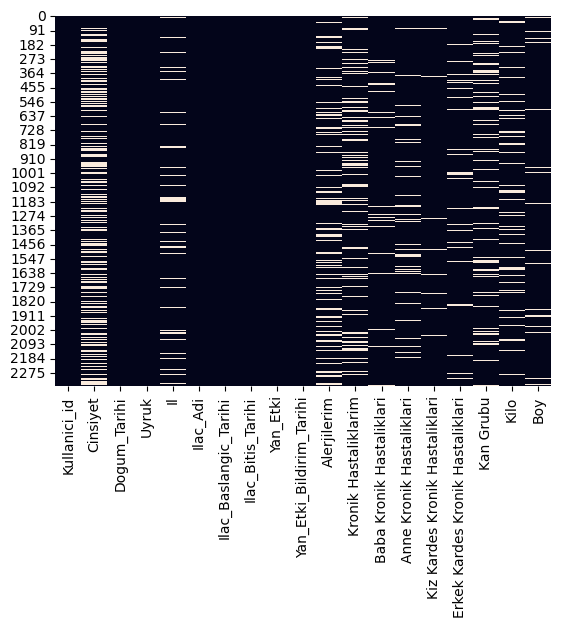

In [9]:
# Count missing values in each column
data.isna().sum()


# Visualize missing data
sns.heatmap(data.isnull(), cbar=False)

Missing values in each feature

In [11]:
data.isnull().sum()

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

In [12]:
# Summary statistics for numerical columns
data.describe()

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552


In [13]:
# Data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [14]:
print(data["Ilac_Adi"].unique())

['trifluoperazine' 'fluphenazine hcl' 'warfarin sodium' 'valproic acid'
 'carbamazepine extended release' 'fluoxetine dr' 'thiothixene'
 'asenapine tablet, sublingual' 'fluphenazine hcl elixir' 'quetiapine'
 'risperdal consta syringe' 'mirtazapine' 'lamictal xr' 'desonide lotion'
 'olanzapine vial' 'hydrocortisone cream' 'venlafaxine'
 'selegiline patch, transdermal 24 hours' 'alprazolam'
 'halobetasol propionate cream' 'duloxetine hydrochloride' 'lurasidone'
 'methylphenidate suspension, extended release 24 hr, reconstituted (suspension, er reconstituted)'
 'chlordiazepoxide-amitriptyline' 'divalproex sodium capsule, sprinkle'
 'phenelzine' 'carbamazepine cr' 'imipramine hcl' 'haloperidol lactate'
 'prochlorperazine maleate' 'amitriptyline hcl' 'fluoxetine' 'lorazepam'
 'olanzapine odt' 'hydroxyzine hcl' 'escitalopram'
 'methylphenidate er tablet, extended release 24 hr' 'trimipramine'
 'risperidone odt' 'fluocinolone acetonide solution, non-'
 'doxepin hcl tablet' 'divalproeks sodyum

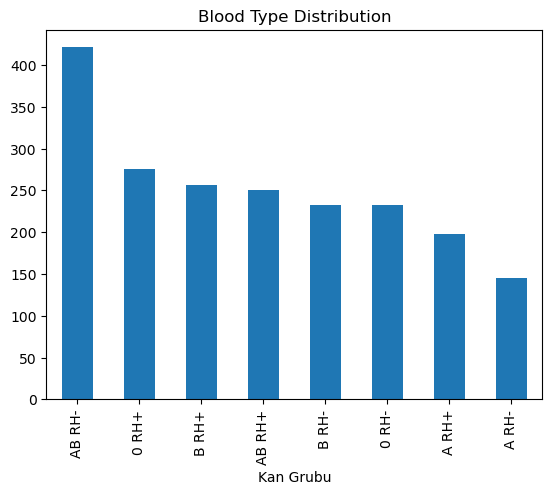

In [15]:
data['Kan Grubu'].value_counts().plot(kind='bar')
plt.title('Blood Type Distribution')
plt.show()

## Conclusion
Data Structure: The dataset consists of 2,357 records with various features, including both numerical and categorical variables. We identified several columns with missing values, particularly in the gender column

Missing Values: A significant number of missing values were observed in the "Gender" column, which accounted for approximately 33% of the entries. This necessitates careful handling, as the absence of gender information may impact the analysis.

Distribution of Numerical Features: I opted to handle missing values of "boy" and "kilo" by calculating separate averages for males and females. By imputing missing height and weight values based on gender-specific averages, I aimed to provide more accurate and contextually relevant estimates. This approach is likely to be more effective than using a single mean or median for the entire dataset, as it accounts for the distinct characteristics of each gender, ultimately enhancing the robustness of the data.

Data Type Conversion: the dataset contains categorical variables that need to be converted to numerical values for effective analysis and modeling. Some of the features are represented as objects, which limits their utility in statistical analyses and machine learning algorithms. To address this, I will employ techniques such as label encoding or one-hot encoding to transform these categorical variables into a numerical format. This conversion is crucial, as it allows for the inclusion of these features in quantitative analyses and enhances the overall predictive power of the model.

# Data Pre-Processing
## Handle Missing Values
We are dropping the Uyruk, id and il columns because it does not provide meaningful information

In [18]:
data = data.drop(columns=['Uyruk'])
data = data.drop(columns=['Il'])
data = data.drop(columns=['Kullanici_id'])

We check whether the data is symmetrical for weight and height before filling in missing values to ensure that the use of mean values is appropriate. This step helps us decide if the mean is a valid measure for imputing missing data or if we need to consider alternatives like the median, particularly if there are outliers in the dataset.

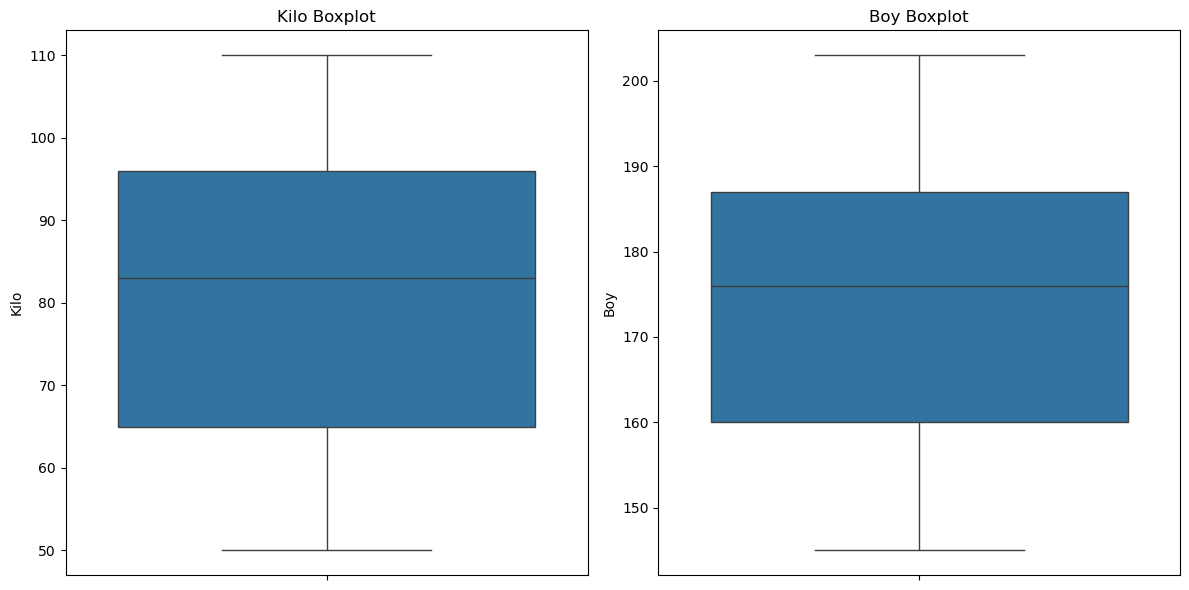

In [20]:
# Grafik boyutlarını ayarlama
plt.figure(figsize=(12, 6))


# Kilo için boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data['Kilo'])
plt.title('Kilo Boxplot')


# Boy için boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data['Boy'])
plt.title('Boy Boxplot')


# Grafiklerin gösterimi
plt.tight_layout()
plt.show()

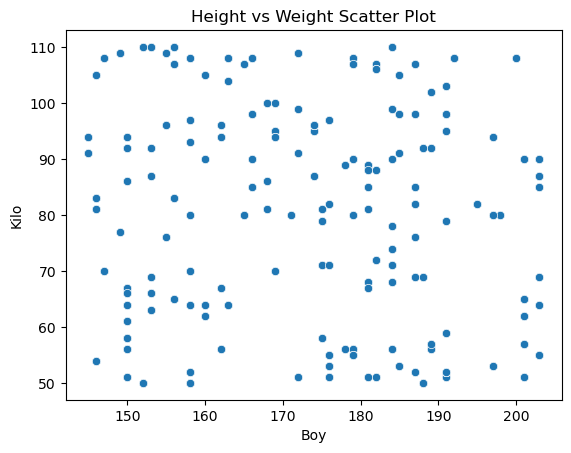

In [21]:
sns.scatterplot(x='Boy', y='Kilo', data=data)
plt.title('Height vs Weight Scatter Plot')
plt.show()

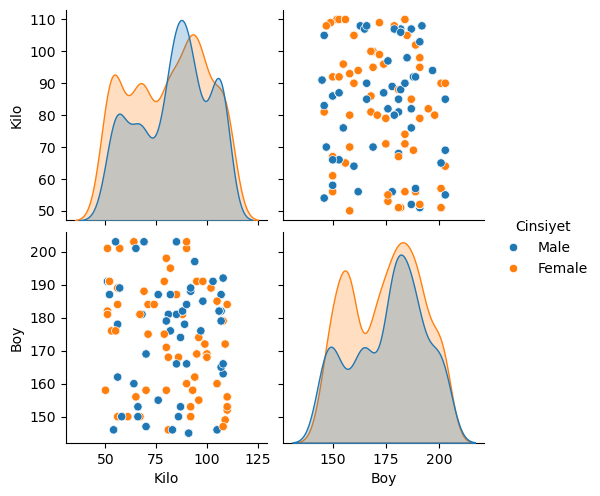

In [22]:
sns.pairplot(data[['Kilo', 'Boy', 'Cinsiyet']], hue='Cinsiyet')
plt.show()


In [23]:
data['Cinsiyet'].value_counts()

Cinsiyet
Female    872
Male      707
Name: count, dtype: int64

Given the significant number of null values in the gender column, I am opting to train a model using the Random Forest Classifier with the existing height and weight data, rather than assigning random values.

In [25]:
#cinsiyetin bilindiği veriler
data_train = data[data['Cinsiyet'].notna()]


#özellikleri ve hedefi belirleme
X = data_train[['Kilo', 'Boy']]  
y = data_train['Cinsiyet']


#veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


#model eğitme
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


#test verisi üzerinde tahmin yapma
y_pred = clf.predict(X_test)


#doğruluk oranını hesaplama
accuracy = accuracy_score(y_test, y_pred)


print(f"Modelin doğruluk oranı: %{accuracy * 100:.2f}")

Modelin doğruluk oranı: %98.10


In [26]:
data.isnull().sum()

Cinsiyet                            778
Dogum_Tarihi                          0
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

After assigning height and weight averages based on the gender variable using the non-null entries, we then fill in the records where both height and weight are missing with the overall averages

In [28]:
#cinsiyete göre boy ve kilo ortalamalarını hesaplama
mean_values = data.groupby('Cinsiyet')[['Kilo', 'Boy']].mean().round()


#female için ortalamaları al
mean_female_kilo = mean_values.loc['Female', 'Kilo']
mean_female_boy = mean_values.loc['Female', 'Boy']


#male için ortalamaları al
mean_male_kilo = mean_values.loc['Male', 'Kilo']
mean_male_boy = mean_values.loc['Male', 'Boy']


#cinsiyetine göre boy ve kilo ortalamalarını yerleştirme
data.loc[data['Cinsiyet'] == 'Female', 'Kilo'] = data.loc[data['Cinsiyet'] == 'Female', 'Kilo'].fillna(mean_female_kilo)
data.loc[data['Cinsiyet'] == 'Female', 'Boy'] = data.loc[data['Cinsiyet'] == 'Female', 'Boy'].fillna(mean_female_boy)


data.loc[data['Cinsiyet'] == 'Male', 'Kilo'] = data.loc[data['Cinsiyet'] == 'Male', 'Kilo'].fillna(mean_male_kilo)
data.loc[data['Cinsiyet'] == 'Male', 'Boy'] = data.loc[data['Cinsiyet'] == 'Male', 'Boy'].fillna(mean_male_boy)


mean_kilo = round(data['Kilo'].mean())
mean_boy = round(data['Boy'].mean())


#boş olan kilo değerlerini genel ortalama ile doldurma
data['Kilo'] = data['Kilo'].fillna(mean_kilo)


#boş olan boy değerlerini genel ortalama ile doldurma
data['Boy'] = data['Boy'].fillna(mean_boy)

In [29]:
data.isnull().sum()

Cinsiyet                            778
Dogum_Tarihi                          0
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                  0
Boy                                   0
dtype: int64

In [30]:
#cinsiyetin bilindiği verilerle modelimizi eğittik (bu adım zaten yukarıda yapılmıştı)

#cinsiyeti bilinmeyen veriler
data_test = data[data['Cinsiyet'].isna()]


#eksik cinsiyet verilerini tahmin etmek için gerekli özellikleri seçme
X_missing = data_test[['Kilo', 'Boy']]


#eksik cinsiyet değerlerini tahmin etme
missing_cinsiyet_pred = clf.predict(X_missing)


#tahmin edilen cinsiyet değerlerini orijinal veri setine yerleştirme
data.loc[data['Cinsiyet'].isna(), 'Cinsiyet'] = missing_cinsiyet_pred


#sonuçları kontrol etme
print(data['Cinsiyet'].isna().sum())

0


We take the mode of blood type to fill in missing values. This approach ensures that we maintain the integrity of our dataset while preparing it for further analysis (given that my medical knowledge is limited, using the mode minimizes the impact of potential inaccuracies in selecting a blood type). By opting for the mode, we utilize the most frequently occurring value, which is a practical choice when dealing with categorical data.

In [32]:
#en sık görülen kan grubunu bulma
mode_kan_grubu = data['Kan Grubu'].mode()[0]
print(mode_kan_grubu)
#boş değerleri en sık görülen kan grubu ile doldurma
data['Kan Grubu'] = data['Kan Grubu'].fillna(mode_kan_grubu)

AB RH-


In [33]:
data.isnull().sum()

Cinsiyet                              0
Dogum_Tarihi                          0
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                             0
Kilo                                  0
Boy                                   0
dtype: int64

In this step, the aim is to determine the patient's age using the date of birth and the date of adverse effect reporting

In [35]:
#doğum tarihi ve hastalık belirti tarihi sütunları
data['Dogum_Tarihi'] = pd.to_datetime(data['Dogum_Tarihi'])
data['Yan_Etki_Bildirim_Tarihi'] = pd.to_datetime(data['Yan_Etki_Bildirim_Tarihi'])


#yaşı hesaplama
data['Yas'] = (data['Yan_Etki_Bildirim_Tarihi'] - data['Dogum_Tarihi']).dt.days // 365


data.drop('Dogum_Tarihi', axis=1, inplace=True)

I determine the duration of the side effect's impact by using the medication start date and the side effect notification date. Since the columns related to the medication start date, side effect notification date, and medication end date are no longer needed for our analysis, we remove them from the dataset. By dropping these columns, we streamline the dataset and focus on the features that are most relevant to our analysis

In [37]:
# İlaç başlangıç ve yan etki bildirim tarihlerini datetime formatına çevirme
data['Ilac_Baslangic_Tarihi'] = pd.to_datetime(data['Ilac_Baslangic_Tarihi'])
data['Yan_Etki_Bildirim_Tarihi'] = pd.to_datetime(data['Yan_Etki_Bildirim_Tarihi'])


# Yan etki oluşma süresini gün cinsinden hesaplama
data['Yan_Etki_Olusma_Suresi'] = (data['Yan_Etki_Bildirim_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days


# Gereksiz kolonları silme
data.drop(['Ilac_Baslangic_Tarihi', 'Yan_Etki_Bildirim_Tarihi', 'Ilac_Bitis_Tarihi'], axis=1, inplace=True)

By replacing existing NaN values with 'Bilinmiyor,' we ensure that our dataset remains complete and can be utilized effectively for analysis and modeling, preventing any loss of information that could occur due to missing values.

In [39]:
#kolonlardaki nan değerlerini 'Unknown' ile doldurma
columns_to_fill = ['Alerjilerim', 'Kronik Hastaliklarim', 'Baba Kronik Hastaliklari', 
                   'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 
                   'Erkek Kardes Kronik Hastaliklari']

for column in columns_to_fill:
    data[column] = data[column].fillna('Bilinmiyor').replace(' ', 'Bilinmiyor')


In [40]:
data.isnull().sum()

Cinsiyet                            0
Ilac_Adi                            0
Yan_Etki                            0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
Yas                                 0
Yan_Etki_Olusma_Suresi              0
dtype: int64

We are organizing the data in the gender column using label encoding

In [42]:
# Label Encoding uygulama
le = LabelEncoder()
data['Cinsiyet'] = le.fit_transform(data['Cinsiyet'])

I used label encoding, but some machine learning algorithms might treat increasing numbers as having significance. In such cases, methods like Target Encoding with a Weighted Mean or Bayesian Target Encoding can also be considered

In [44]:
# Benzersiz ilaç isimlerine tamsayı atama
data['Ilac_Adi'], unique_ilac = pd.factorize(data['Ilac_Adi'])
data['Yan_Etki'], unique_ilac = pd.factorize(data['Yan_Etki'])
data['Alerjilerim'], unique_ilac = pd.factorize(data['Alerjilerim'])

i chose to use one-hot encoding for the blood type variable due to its limited number of categories.

In [46]:
# One-Hot Encoding uygulama
one_hot_encoded = pd.get_dummies(data['Kan Grubu'], prefix='Kan Grubu')


# Orijinal DataFrame ile one-hot encoded DataFrame'i birleştirme
data = pd.concat([data, one_hot_encoded], axis=1)


data = data.drop(columns=['Kan Grubu'])

In [47]:
def count_diseases(value):
    if pd.isna(value) or value == '' or value == 'Bilinmiyor':
        return 0
    elif isinstance(value, str):
        return len([disease.strip() for disease in value.split(',') if disease.strip()])
    elif isinstance(value, list):
        return len(value)
    else:
        return 1



def targeted_disease_encoding(df, target_columns):
    encoded_df = df.copy()
    for column in target_columns:
        if column in df.columns:
            encoded_df[column] = df[column].apply(count_diseases)
        else:
            print(f"Uyarı: '{column}' sütunu veri setinde bulunamadı.")
    return encoded_df


# Hedef sütunların listesi
target_columns = [
    "Kronik Hastaliklarim",
    "Baba Kronik Hastaliklari",
    "Anne Kronik Hastaliklari",
    "Kiz Kardes Kronik Hastaliklari",
    "Erkek Kardes Kronik Hastaliklari"
]


df = pd.DataFrame(data)
# Hedefli encoding'i uygula
encoded_df = targeted_disease_encoding(df, target_columns)

In [48]:
encoded_df = encoded_df.drop_duplicates()

In the correlation analysis of the dataset related to drug side effects, it was observed that most features exhibit weak correlations with the target variable, "Yan_Etki." Most correlation values fall between 0 and 0.1, indicating that the linear relationship between the features and the side effects is quite weak. This suggests that the occurrence of side effects may be influenced by complex, non-linear interactions between variables rather than simple direct relationships. As a result, more advanced modeling techniques, such as non-linear models or ensemble methods, may be required to capture the underlying patterns and improve the predictive performance of the model.

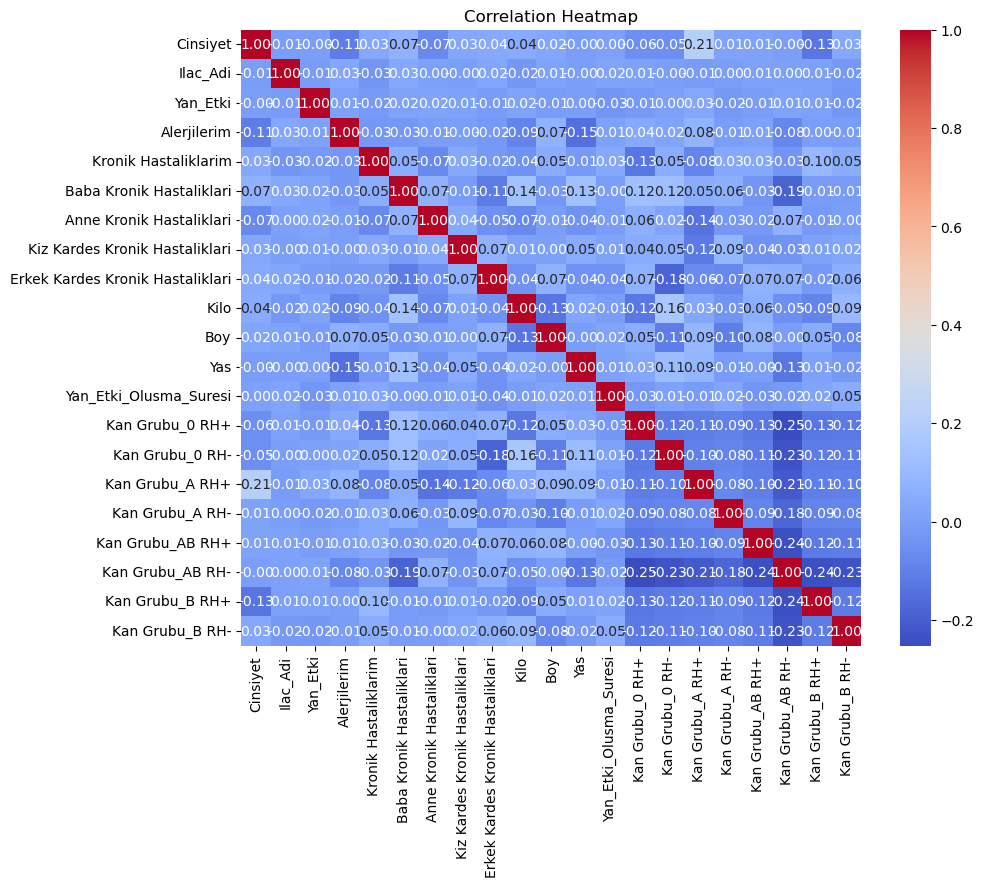

In [50]:
# Compute the correlation matrix
correlation_matrix = encoded_df.corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Now that the data cleaning process is complete, we are preparing the cleaned dataset for model training. This includes splitting the data into training and test sets, with the target variable being Yan_Etki, to ensure the model can be trained and evaluated effectively

In [52]:
#özellikler (features) ve hedef (target) sütunu
X = encoded_df.drop(columns=['Yan_Etki'])  # 'Yan_Etki' hariç tüm sütunlar özellik olarak kullanılacak
y = encoded_df['Yan_Etki']  # 'Yan_Etki' tahmin edilmek istenen hedef sütunu


#veriyi eğitim ve test setlerine bölme (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=22)


#bölüştürme işlemi tamamlandı
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1932, 20)
X_test shape: (425, 20)
y_train shape: (1932,)
y_test shape: (425,)


In [53]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cinsiyet                          2357 non-null   int32  
 1   Ilac_Adi                          2357 non-null   int64  
 2   Yan_Etki                          2357 non-null   int64  
 3   Alerjilerim                       2357 non-null   int64  
 4   Kronik Hastaliklarim              2357 non-null   int64  
 5   Baba Kronik Hastaliklari          2357 non-null   int64  
 6   Anne Kronik Hastaliklari          2357 non-null   int64  
 7   Kiz Kardes Kronik Hastaliklari    2357 non-null   int64  
 8   Erkek Kardes Kronik Hastaliklari  2357 non-null   int64  
 9   Kilo                              2357 non-null   float64
 10  Boy                               2357 non-null   float64
 11  Yas                               2357 non-null   int64  
 12  Yan_Et